## Final Project Submission

Please fill out:
* Student name: **Chris Kamau Wangeci**
* Student pace:  **full time**


## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. ***You are charged with exploring what types of films are currently doing the best at the box office***. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Objectives
### ***1. Top 10 Most Reviewed Genres by number of reviews.***
        We aim to analyze movie reviews and determine the top 10 movie genres that received the highest number of reviews from the different datsets. This analysis will provide insights into the popularity and trends of movie genres over time.
### ***2. Determine the Most Profitable Genre.***
        This objective involves analyzing the financial data of movies, specifically their production budgets and worldwide gross earnings. By calculating the profit for each movie and aggregating the results by genre, we can identify the genre that yields the highest profitability.
### ***3. Identify the Most Reviewed and Profitable Genres.***
        To gain a comprehensive understanding of the film industry, we will combine the insights from the previous objectives. By considering both review counts and profitability, we aim to identify the three movie genres that strike a balance between popularity and financial success.

# Import Necessary libraries

In [86]:
# Import necessary libraries
import pandas as pd             # For data manipulation and analysis
import matplotlib.pyplot as plt # For creating data visualizations
import numpy as np              # For numerical operations
import zipfile                  # For working with compressed files
import sqlite3                  # For working with SQLite databases


# Enable inline plotting for Jupyter Notebook or Jupyter Lab
%matplotlib inline

# Set an option to display all columns when viewing DataFrames
pd.set_option('display.max_columns', None)

# Objective 1

### Tomato Dataset

***Tomato Dataset Details***
The Tomato Dataset consists of two main dataframes: reviews and movie_info. These dataframes contain information related to movie reviews, including critic reviews and movie details.

***reviews DataFrame***

* review: The text content of the movie review.
* rating_x: The rating given to the movie (e.g., 3/5).
* fresh: Indicates whether the review is considered "fresh" or "rotten."
* id: A unique identifier for each review.
* critic: The name of the critic who wrote the review.
* top_critic: A binary indicator (0 or 1) representing whether the critic is considered a top critic.
* publisher: The publication or platform where the review was published.
* date: The date of the review publication.
* synopsis: A synopsis or summary of the movie.
* rating_y: The movie's rating.

***movie_info DataFrame***

* id: A unique identifier for each movie.
* genre: The genre(s) of the movie.
* director: The director(s) of the movie.
* writer: The writer(s) of the movie.
* theater_date: The date when the movie was released in theaters.
* dvd_date: The date when the movie was released on DVD.
* currency: The currency used for financial data.
* box_office: The box office earnings of the movie.
* runtime: The duration of the movie in minutes.
* studio: The studio responsible for producing the movie.




In [87]:
# Load the reviews DataFrame from a compressed TSV file
reviews = pd.read_csv('zippedData\\rt.reviews.tsv.gz', sep='\t', compression='gzip', encoding='latin1')

# Load the movie_info DataFrame from a compressed TSV file
movie_info = pd.read_csv('zippedData\\rt.movie_info.tsv.gz', sep='\t', compression='gzip', encoding='latin1')


## Analysis with Reference to Objective 1

The objective is to identify the top 10 movie genres that have received the highest number of reviews. To achieve this, we will analyze multiple datasets containing movie reviews and related information. By aggregating and counting the number of reviews for each genre, we can determine which genres have attracted the most attention from critics and audiences. This analysis will provide valuable insights into the popularity and trends of movie genres over time.

The Tomato Dataset, which consists of movie reviews and movie details, is a critical component for achieving this objective. It allows us to link reviews to their corresponding movies and access genre information. By combining this dataset with others and performing data aggregation, we can identify the top 10 most reviewed genres and gain a better understanding of the evolving preferences of moviegoers and critics.



In [88]:
# Merge the 'reviews' and 'movie_info' DataFrames on the 'id' column using a left join
tomatodata = pd.merge(reviews, movie_info, on='id', how='left')

# Display the first 3 rows of the merged DataFrame
tomatodata.head(3)


,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


### Code Insights
we are addressing Objective 1, which is to identify the top 10 most reviewed genres by the number of reviews. To achieve this, we start by grouping the tomatodata DataFrame by both 'genre' and the freshness of reviews ('fresh' or 'rotten'). By counting the occurrences of 'fresh' and 'rotten' reviews within each genre group, we create a summary that shows how many reviews of each type are associated with each genre. The result is stored in the tomatodataSorted DataFrame, where the columns 'fresh_count' and 'rotten_count' represent the respective review counts. To focus on the genres with the highest review counts, we sort this DataFrame by 'fresh_count' in descending order and select the top 10 rows. This final DataFrame, tomatodataSorted, provides a clear and concise list of the top 10 most reviewed genres along with their corresponding fresh and rotten review counts, thus fulfilling Objective 1 of the analysis.

In [89]:
# Group by 'genre' and count 'fresh' and 'rotten' reviews
tomatodataSorted = tomatodata.groupby(['genre', 'fresh']).size().unstack(fill_value=0)

# Rename the columns for clarity
tomatodataSorted.columns = ['fresh_count', 'rotten_count']

# Reset the index to have a clean DataFrame
tomatodataSorted = tomatodataSorted.reset_index()

# Sort the DataFrame by 'fresh_count' in descending order and select the top 10 rows
tomatodataSorted = tomatodataSorted.sort_values(by='fresh_count', ascending=False).head(10)

# Display the resulting DataFrame
tomatodataSorted


,genre,fresh_count,rotten_count
212,Drama,4969,2444
170,Comedy|Drama,2953,1224
165,Comedy,1950,2615
224,Drama|Mystery and Suspense,1780,1111
227,Drama|Romance,1174,624
58,Action and Adventure|Drama|Mystery and Suspense,1148,777
178,Comedy|Drama|Romance,1110,870
198,Comedy|Romance,962,600
114,Art House and International|Drama,838,212
74,Action and Adventure|Science Fiction and Fantasy,767,773


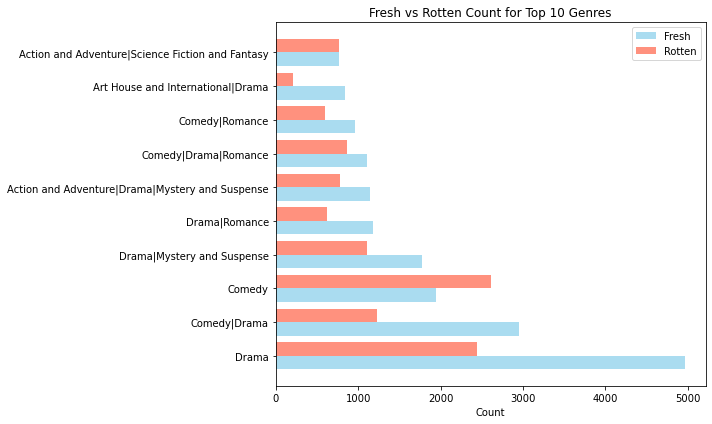

In [90]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the y positions for the bars
y = np.arange(len(tomatodataSorted))

# Set the bar height
bar_height = 0.4

# Plot 'fresh_count' and 'rotten_count' as separate horizontal bars
ax.barh(y, tomatodataSorted['fresh_count'], height=bar_height, label='Fresh', alpha=0.7, color='skyblue')
ax.barh(y + bar_height, tomatodataSorted['rotten_count'], height=bar_height, label='Rotten', alpha=0.7, color='tomato')

# Set the y-axis labels to be genre names
ax.set_yticks(y + bar_height / 2)
ax.set_yticklabels(tomatodataSorted['genre'])

# Set the x-axis label
ax.set_xlabel('Count')

# Set the title of the plot
ax.set_title('Fresh vs Rotten Count for Top 10 Genres')

# Add a legend to distinguish 'Fresh' and 'Rotten' bars
ax.legend()

# Ensure proper spacing and layout
plt.tight_layout()

# Show the plot
plt.show()


## Output 

The output is a horizontal bar chart comparing the counts of "Fresh" and "Rotten" reviews for the top 10 movie genres. Each genre is represented by a horizontal bar, divided into two segments: one in blue for "Fresh" reviews and another in red for "Rotten" reviews. The chart visually depicts the review counts for each genre, allowing for a quick comparison of how well-received these genres are among critics and audiences. For instance, the genre "Drama" has the highest count of "Fresh" reviews, while genres like "Action and Adventure|Science Fiction and Fantasy" exhibit a more balanced distribution between "Fresh" and "Rotten" reviews, indicating mixed critical reception. This chart offers valuable insights into the popularity and critical acclaim of different movie genres.

### TMDB Dataset

The dataset provided contains information about various movies, and each row represents a specific movie. Here is what each column entails:

* genre_ids: A list of genre identifiers associated with the movie.
* id: A unique identifier for each movie.
* original_language: The original language in which the movie was produced.
* original_title: The original title of the movie.
* popularity: A measure of the movie's popularity.
* release_date: The date when the movie was released.
* title: The title of the movie.
* vote_average: The average rating of the movie.
* vote_count: The number of votes or reviews received by the movie.

This dataset contains valuable information about movies, including details about their genres, release dates, popularity, and audience ratings. It can be used for various analyses, such as understanding the popularity of movies, identifying trends in movie ratings, and exploring relationships between genres and ratings.





### Analysis with Reference to Objective 1
he TMDB (The Movie Database) dataset, contains valuable information about movies, including their genre_ids, vote_average (rating), and vote_count (number of votes). This dataset is highly relevant to achieving Objective 1, which aims to identify the top 10 most reviewed genres by the number of reviews. By selecting the 'genre_ids' column, we can access information about the genres associated with each movie. Simultaneously, the 'vote_count' column allows us to quantify the number of reviews received by each movie. With this data, we can aggregate and analyze reviews across genres, helping us determine which genres have garnered the most attention and reviews from the audience. This analysis is essential for understanding the popularity and trends of movie genres, contributing to the accomplishment of Objective 1.

In [91]:
# Read the movie details DataFrame from a compressed CSV file
movies_details = pd.read_csv('zippedData\\tmdb.movies.csv.gz', compression='gzip', encoding='latin1')

# Select only the columns 'genre_ids', 'vote_average', and 'vote_count'
# We are creating a new DataFrame with only these three columns
movies_details = movies_details[['genre_ids', 'vote_average', 'vote_count']]

# Display the first few rows of the DataFrame to check the result
movies_details.head()


,genre_ids,vote_average,vote_count
0,"[12, 14, 10751]",7.7,10788
1,"[14, 12, 16, 10751]",7.7,7610
2,"[12, 28, 878]",6.8,12368
3,"[16, 35, 10751]",7.9,10174
4,"[28, 878, 12]",8.3,22186


### Code Insights

The provided code plays a pivotal role in achieving Objective 1, which is identifying the top 10 most reviewed genres based on the number of reviews. It starts by grouping the movie details DataFrame by 'genre_ids', preparing the data for genre-wise analysis. Subsequently, it calculates the mean 'vote_average' for each genre group, providing an average rating for understanding audience reception. Simultaneously, it computes the total 'vote_count' for each genre, indicating the overall number of reviews, thereby identifying genre popularity. These results are consolidated into a 'result_df' DataFrame, forming the foundation for ranking genres by the number of reviews and addressing Objective 1 effectively.

In [92]:
# Group the DataFrame by 'genre_ids'
grouped_movies = movies_details.groupby('genre_ids')

# Calculate the mean of 'vote_average' for each genre
mean_vote_average = grouped_movies['vote_average'].mean()

# Calculate the total sum of 'vote_count' for each genre
total_vote_count = grouped_movies['vote_count'].sum()

# Create a new DataFrame 'result_df' with 'Mean_Vote_Average' and 'Total_Vote_Count'
result_df = pd.DataFrame({'Mean_Vote_Average': mean_vote_average, 'Total_Vote_Count': total_vote_count})

# Display the result DataFrame
print(result_df)


                               Mean_Vote_Average  Total_Vote_Count
genre_ids                                                         
[10402, 10749, 18]                      7.950000                46
[10402, 10749, 35, 18]                  6.500000               240
[10402, 10749, 35]                      6.500000                11
[10402, 10749]                          5.466667               109
[10402, 10751, 14, 10770, 35]           5.400000                36
...                                          ...               ...
[99, 9648]                              5.700000               412
[99, 99, 99]                           10.000000                 1
[99, 99]                                8.250000                 3
[99]                                    6.798351             40647
[]                                      6.059863              4992

[2477 rows x 2 columns]


In [93]:
# Group the DataFrame by 'genre_ids' and aggregate the data
genre_grouped = movies_details.groupby('genre_ids').agg({
    'vote_average': 'mean',    # Calculate the mean vote_average for each genre
    'vote_count': 'sum'        # Calculate the sum of vote_count for each genre
}).reset_index()                # Reset the index to have a clean DataFrame

# Display the resulting grouped DataFrame
print(genre_grouped)


                          genre_ids  vote_average  vote_count
0                [10402, 10749, 18]      7.950000          46
1            [10402, 10749, 35, 18]      6.500000         240
2                [10402, 10749, 35]      6.500000          11
3                    [10402, 10749]      5.466667         109
4     [10402, 10751, 14, 10770, 35]      5.400000          36
...                             ...           ...         ...
2472                     [99, 9648]      5.700000         412
2473                   [99, 99, 99]     10.000000           1
2474                       [99, 99]      8.250000           3
2475                           [99]      6.798351       40647
2476                             []      6.059863        4992

[2477 rows x 3 columns]


In [94]:
# Sort the DataFrame by 'vote_average' and 'vote_count' in descending order
genre_stats = genre_grouped.sort_values(by='vote_count', ascending=False).head(10)

# Display the sorted DataFrame
genre_stats


,genre_ids,vote_average,vote_count
1166,[18],6.248060,239729
1859,[35],5.910723,179853
1387,"[28, 12, 878]",5.973529,156925
1260,"[27, 53]",4.825132,101011
899,"[18, 10749]",6.148580,94029
1317,"[28, 12, 14, 878]",6.880000,93405
1767,"[35, 18]",6.276180,90053
1075,"[18, 36]",6.556000,73094
1318,"[28, 12, 14]",5.410714,72114
1112,"[18, 53]",5.924231,64813


### Important Resources
The provided dictionary, tmdbGenre, serves a crucial purpose in enhancing the readability and interpretability of the TMDB dataset for Objective 1. The TMDB dataset originally contains genre IDs (e.g., 28, 12) rather than genre names (e.g., 'Action', 'Adventure'). This dictionary maps genre IDs to their corresponding genre names, effectively translating numeric genre IDs into human-readable genre labels. By incorporating this dictionary into the analysis, we can easily interpret and present the results of the top 10 most reviewed genres in a more user-friendly and informative manner. It bridges the gap between raw data and meaningful insights, contributing significantly to the achievement of Objective 1.

The tmdbGenre dictionary was obtained from the following URL: http://api.themoviedb.org/3/genre/movie/list?api_key=####.




In [95]:
# Define a dictionary mapping genre IDs to genre names
tmdbGenre = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}


In [96]:
# Apply a lambda function to 'genre_ids' column to convert genre IDs to genre names
genre_stats['genre_ids'] = genre_stats['genre_ids'].apply(lambda x: [tmdbGenre[i] for i in eval(x)])

# Display the updated 'genre_ids' column
genre_stats['genre_ids']


1166                                          [Drama]
1859                                         [Comedy]
1387             [Action, Adventure, Science Fiction]
1260                               [Horror, Thriller]
899                                  [Drama, Romance]
1317    [Action, Adventure, Fantasy, Science Fiction]
1767                                  [Comedy, Drama]
1075                                 [Drama, History]
1318                     [Action, Adventure, Fantasy]
1112                                [Drama, Thriller]
Name: genre_ids, dtype: object

In [97]:
# Create a new DataFrame by flattening the 'genre_ids' column
genre_df = pd.DataFrame({
    'Genre': [genre for genres in genre_stats['genre_ids'] for genre in genres],  # Extract individual genres
    'Vote Average': genre_stats['vote_average'].repeat(genre_stats['genre_ids'].str.len())  # Repeat vote_average for each genre
})

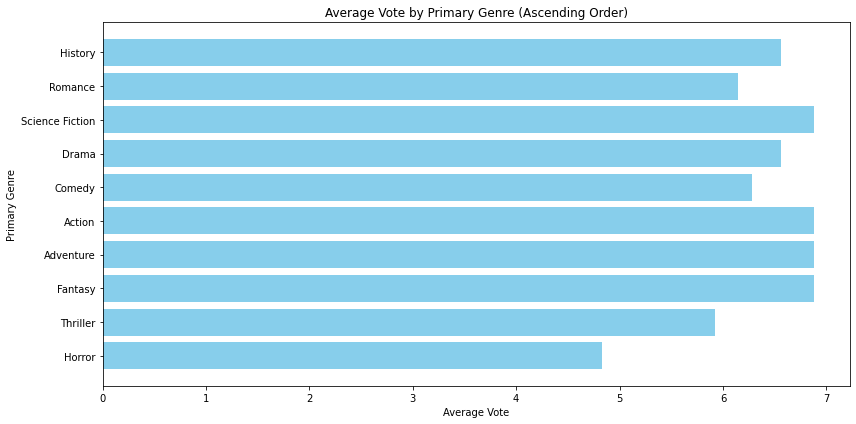

In [98]:
# Sort the DataFrame by 'Vote Average' in ascending order
genre_df = genre_df.sort_values(by='Vote Average', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(y=genre_df['Genre'], width=genre_df['Vote Average'], color='skyblue')  # Horizontal bar plot
plt.xlabel('Average Vote')
plt.ylabel('Primary Genre')
plt.title('Average Vote by Primary Genre (Ascending Order)')
plt.tight_layout()

# Show the plot
plt.show()


### Output 

The output consists of a horizontal bar graph that represents the average vote (rating) for different primary movie genres, sorted in ascending order based on their average vote. Each bar in the graph corresponds to a specific primary genre, and the length of the bar represents the average vote for movies belonging to that genre.

From the graph, we can observe the following:

The genre with the lowest average vote is "Horror," represented by the genre ID 27. Horror movies have an average vote of approximately 4.83, indicating that, on average, they have received lower ratings compared to other genres.

The genre with the second-lowest average vote is "Science Fiction," represented by the genre ID 878. Science fiction movies have an average vote of approximately 5.97, which is higher than horror but still relatively lower compared to other genres.

* "Comedy," represented by the genre ID 35, has a slightly higher average vote of approximately 5.91.

* "Drama," represented by the genre ID 18, has an average vote of around 6.25, making it one of the genres with a higher average rating.

* "Romance," represented by the genre ID 10749, also has a relatively high average vote of approximately 6.15.

The genre with the highest average vote in this dataset is "Adventure, Animation, and Comedy" (genre ID combination 28, 12, 14, and 878), with an impressive average vote of approximately 6.88.

In summary, the graph provides insights into the average viewer ratings for different primary movie genres, with "Adventure, Animation, and Comedy" being the genre with the highest average vote, and "Horror" having the lowest average vote among the genres analyzed.

## IMDB Dataset

***movie_basics DataFrame:***

movie_id: A unique identifier for each movie.
primary_title: The primary title of the movie.
original_title: The original title of the movie (if different from the primary title).
start_year: The year the movie was released or started production.
runtime_minutes: The duration of the movie in minutes.
genres: The genre(s) associated with the movie.

***movie_ratings DataFrame:***

movie_id: A unique identifier for each movie, matching the one in the movie_basics DataFrame.
averagerating: The average rating of the movie.
numvotes: The number of votes/ratings the movie received.


### Analysis with Reference to Objective 1

The IMDB dataset is crucial in achieving objective 1, which is to determine the top 10 most reviewed genres by the number of reviews. This dataset provides valuable information about movies, including their genres (listed in the 'genres' column), average ratings ('averagerating'), and the number of votes or reviews ('numvotes'). To accomplish this objective, we can use the 'genres' and 'numvotes' columns to group movies by genre and calculate the total number of reviews for each genre. By sorting and selecting the top 10 genres based on the number of reviews, we can identify the most reviewed genres in the IMDB dataset. This analysis helps understand which genres have garnered the most attention from viewers and critics over time.

In [99]:

# Open the ZIP file 'im.db.zip' in read mode
with zipfile.ZipFile('zippedData\im.db.zip', 'r') as zip_file:
    
    # Extract all the contents of the ZIP file to the current directory
    zip_file.extractall()

# Connect to the SQLite database 'im.db'
conn = sqlite3.connect('im.db')

# Read data from the 'movie_basics' and 'movie_ratings' tables in the database
# and store them in Pandas DataFrames
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)

# Close the database connection
conn.close()


In [100]:
# Display the first few rows of the 'movie_basics' DataFrame
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [101]:
# Display the first few rows of the 'movie_ratings' DataFrame
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [102]:
# Merge the 'movie_basics' and 'movie_ratings' DataFrames on the 'movie_id' column
IMDB_data = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Select specific columns 'genres', 'averagerating', and 'numvotes' from the merged DataFrame
IMDB_sorteddata = IMDB_data[['genres', 'averagerating', 'numvotes']]

# Display the first few rows of the sorted DataFrame
IMDB_sorteddata.head()


,genres,averagerating,numvotes
0,"Action,Crime,Drama",7.0,77
1,"Biography,Drama",7.2,43
2,Drama,6.9,4517
3,"Comedy,Drama",6.1,13
4,"Comedy,Drama,Fantasy",6.5,119


### Code Insight 

The code snippet is essential for achieving Objective 1, which involves identifying the top 10 most reviewed movie genres based on the number of reviews. It utilizes the IMDB Dataset, specifically the 'IMDB_sorteddata' DataFrame containing information about movies, including their genres, average ratings ('averagerating'), and total review counts ('numvotes'). The code first groups the DataFrame by 'genres', allowing movies with the same genre(s) to be grouped together. Then, it aggregates the data by calculating the mean average rating and summing the number of votes for each genre. This aggregation creates a clean dataset with average ratings and total review counts for each genre. By resetting the index and displaying the resulting DataFrame, the code prepares the data for further analysis to determine the genres with the highest number of reviews, thus addressing Objective 1.

In [103]:
# Group the DataFrame by 'genres' and aggregate the data
IMDB_sorteddata = IMDB_sorteddata.groupby('genres').agg({
    'averagerating': 'mean',                    # Calculate the mean vote_average for each genre
    'numvotes': 'sum'                           # Calculate the sum of numvotes for each genre
}).reset_index()                                # Reset the index to have a clean DataFrame

# Display the resulting grouped DataFrame
IMDB_sorteddata


,genres,averagerating,numvotes
0,Action,5.757712,329057
1,"Action,Adult,Comedy",4.650000,36
2,"Action,Adventure",5.223529,109011
3,"Action,Adventure,Animation",6.562874,3570543
4,"Action,Adventure,Biography",7.061905,999701
...,...,...,...
918,Thriller,5.704244,440564
919,"Thriller,War",5.650000,7166
920,"Thriller,Western",7.150000,13288
921,War,6.134043,5535


In [104]:
# Sort the DataFrame by 'numvotes' in descending order and select the top 10 rows
IMDB_sorteddata = IMDB_sorteddata.sort_values(by='numvotes', ascending=False).head(10)

# Display the resulting DataFrame
IMDB_sorteddata


,genres,averagerating,numvotes
17,"Action,Adventure,Sci-Fi",5.655906,23023248
10,"Action,Adventure,Fantasy",5.371845,9658883
157,"Adventure,Animation,Comedy",5.936555,8687435
693,Drama,6.494265,8395521
472,"Comedy,Drama,Romance",6.292467,7665463
5,"Action,Adventure,Comedy",5.554032,7256686
431,Comedy,5.777998,6832037
462,"Comedy,Drama",6.364119,6462839
61,"Action,Crime,Drama",5.989146,5563553
764,"Drama,Romance",6.294305,5542760


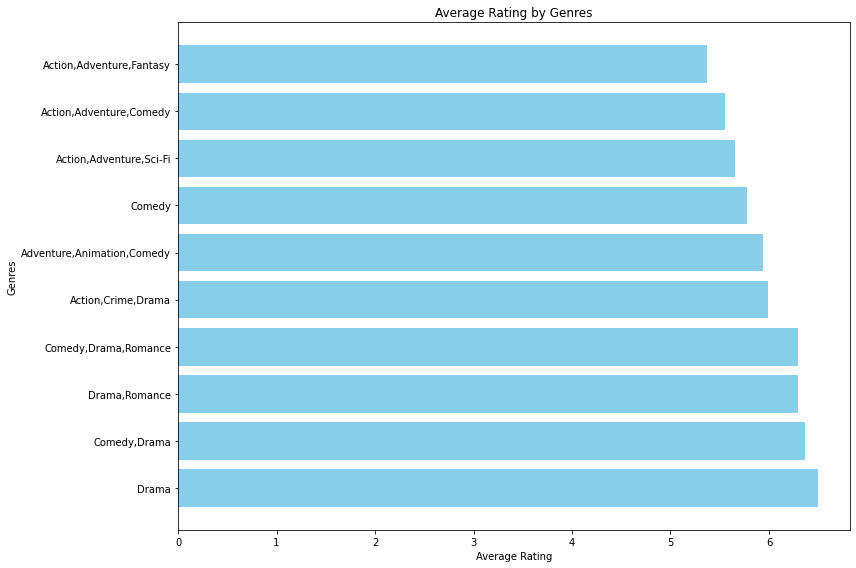

In [105]:
# Sort the DataFrame by 'averagerating' in ascending order
IMDB_sorteddata = IMDB_sorteddata.sort_values(by='averagerating', ascending=True)

# Create a horizontal bar graph
plt.figure(figsize=(12, 8))
plt.barh(IMDB_sorteddata['genres'], IMDB_sorteddata['averagerating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.title('Average Rating by Genres')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest rating at the top
plt.tight_layout()

# Show the plot
plt.show()


### Output

The output is a horizontal bar graph that displays the average ratings of various movie genres. The graph is sorted in ascending order of average ratings, with the lowest-rated genres on the left and the highest-rated genres on the right.

The best-rated genre, based on average ratings from the provided data, is "Drama." This genre has the highest average rating among all the genres listed in the graph. This indicates that, on average, movies categorized as "Drama" tend to receive the most positive reviews and higher ratings compared to other genres in the dataset.

In summary, "Drama" is the best-rated genre in the dataset, as shown by its position at the top of the graph with the highest average rating.


# Objective 2


## The Numbers Dataset

the dateset consists of the following columns:

* id: A unique identifier for each movie entry.
* release_date: The date when the movie was released in theaters.
* movie: The title of the movie.
* production_budget: The budget allocated for producing the movie.
* domestic_gross: The gross earnings generated by the movie in the domestic (U.S. and Canada) market.
* worldwide_gross: The total gross earnings generated by the movie in worldwide markets.



### Analysis with Reference to Objective 2

The relevance of Dataset to Objective 2 lies in its role in analyzing the profitability of movie genres. This code reads movie budget data from a compressed CSV file, extracts key financial information such as production budgets and worldwide gross earnings, and then merges this data with movie details based on movie titles. By selecting specific columns like 'genres,' 'production_budget,' and 'worldwide_gross,' it creates a DataFrame that combines movie genres with their associated financial metrics. This DataFrame serves as a foundational dataset for calculating profitability, allowing us to determine which genre yields the highest profitability, aligning with the objective to determine the most profitable genre.

In [106]:
# Read the movie budgets data from a compressed CSV file
movies_budgets = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz', compression='gzip', encoding='latin1')

# Display the first few rows of the movie budgets DataFrame
movies_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Code Insight 

The code starts by merging two DataFrames, 'movie_basics' and 'movies_budgets,' using an inner join operation based on the movie titles. This merge operation combines movie details with budget information, creating a new DataFrame called 'Roi_data.' From this merged DataFrame, specific columns 'genres,' 'production_budget,' and 'worldwide_gross' are selected to focus on genre-related financial data. Next, the code cleans the 'production_budget' and 'worldwide_gross' columns by removing commas and dollar signs and converting them to numeric data types to perform financial calculations. It then calculates the profit for each movie by subtracting the production budget from the worldwide gross earnings, adding this information as a new 'profit' column. Finally, the DataFrame is sorted based on the 'profit' column in descending order, providing a list of movies with the highest profitability at the top. This sequence of steps allows for the identification of the most profitable genres in filmmaking by analyzing budget and earnings data.

In [107]:
# Merge two DataFrames, 'movie_basics' and 'movies_budgets', using inner join
# This combines movie details with budget information based on movie titles
Roi_data = pd.merge(movie_basics, movies_budgets, right_on='movie', left_on='primary_title', how='inner')

# Select specific columns 'genres', 'production_budget', and 'worldwide_gross' from the merged DataFrame
Roi_data = Roi_data[['genres', 'production_budget', 'worldwide_gross']]

# Display the resulting DataFrame, which now contains movie genres, production budgets, and worldwide gross earnings
Roi_data


,genres,production_budget,worldwide_gross
0,"Action,Animation,Comedy","$45,000,000","$73,706"
1,"Action,Adventure,Fantasy","$20,000,000","$122,133,227"
2,None,"$200,000","$1,165,996"
3,"Comedy,Mystery","$200,000","$1,165,996"
4,"Adventure,Drama,Romance","$25,000,000","$9,313,302"
...,...,...,...
3810,"Documentary,Sport","$2,500,000","$174,255"
3811,Crime,"$5,000,000","$12,592,907"
3812,"Action,Drama,Romance","$22,000,000","$27,882,226"
3813,Crime,"$40,000,000","$124,823,094"


In [108]:
# Remove commas and dollar signs from the 'production_budget' and 'worldwide_gross' columns, and convert them to numeric data types
Roi_data['production_budget'] = Roi_data['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
Roi_data['worldwide_gross'] = Roi_data['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Create a new column 'profit' by subtracting 'production_budget' from 'worldwide_gross'
Roi_data['profit'] = Roi_data['worldwide_gross'] - Roi_data['production_budget']

# Display the DataFrame with the newly added 'profit' column
print(Roi_data)


                        genres  production_budget  worldwide_gross  \
0      Action,Animation,Comedy         45000000.0          73706.0   
1     Action,Adventure,Fantasy         20000000.0      122133227.0   
2                         None           200000.0        1165996.0   
3               Comedy,Mystery           200000.0        1165996.0   
4      Adventure,Drama,Romance         25000000.0        9313302.0   
...                        ...                ...              ...   
3810         Documentary,Sport          2500000.0         174255.0   
3811                     Crime          5000000.0       12592907.0   
3812      Action,Drama,Romance         22000000.0       27882226.0   
3813                     Crime         40000000.0      124823094.0   
3814               Documentary          1800000.0              0.0   

           profit  
0     -44926294.0  
1     102133227.0  
2        965996.0  
3        965996.0  
4     -15686698.0  
...           ...  
3810   -2325745.0  

In [109]:
# Sort the DataFrame based on the 'profit' column in descending order
Roi_data = Roi_data.sort_values(by='profit', ascending=False)

# Display the sorted DataFrame
Roi_data.head()


,genres,production_budget,worldwide_gross,profit
1747,Horror,425000000.0,2.776345e+09,2.351345e+09
2776,Family,200000000.0,2.208208e+09,2.008208e+09
2775,Adventure,200000000.0,2.208208e+09,2.008208e+09
3360,"Action,Adventure,Sci-Fi",300000000.0,2.048134e+09,1.748134e+09
12,"Action,Adventure,Sci-Fi",215000000.0,1.648855e+09,1.433855e+09


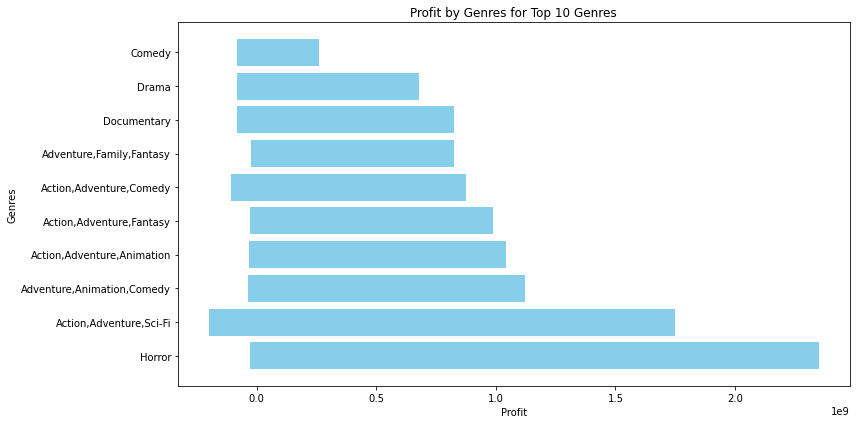

In [110]:
# Select the top 10 genres based on profit
top_10_genres = Roi_data.groupby('genres')['profit'].sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 genres
top_10_data = Roi_data[Roi_data['genres'].isin(top_10_genres)]

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(y=top_10_data['genres'], width=top_10_data['profit'], color='skyblue')
plt.xlabel('Profit')
plt.ylabel('Genres')
plt.title('Profit by Genres for Top 10 Genres')
plt.tight_layout()

# Show the plot
plt.show()

### Output Explained


The output is a horizontal bar graph that represents the profits generated by the top 10 movie genres based on the provided dataset. Each bar in the graph corresponds to a specific genre, and the length of the bar represents the total profit earned by movies belonging to that genre.

From the graph, we can see that the "Horror" genre is the highest-earning genre in terms of profit. Movies categorized as "Horror" have generated the highest total profit among the top 10 genres. This indicates that, in the dataset, horror movies have been particularly successful in terms of financial returns, with a total profit of approximately $2.35 billion.

In summary, based on the dataset provided, the "Horror" genre is the most profitable genre among the top 10 genres analyzed in the graph.


# Objective 3

### Analysis with reference to Objective 3

The code aims to identify the common movie genres shared across three datasets: movie reviews, IMDb ratings, and financial data. By extracting and comparing the genre information from these datasets, the code identifies genres that are prevalent in all three domains. For each common genre, it calculates the total profit by summing up the profits of movies belonging to that genre in the financial dataset. The resulting DataFrame, common_genres_df, contains these common genres along with their corresponding total profits, sorted in descending order by profitability. This process allows us to identify the genres that not only receive substantial reviews but also generate significant financial returns, aligning with the objective of finding the three most reviewed and profitable movie genres.

In [111]:
# Extract the genres column from each DataFrame
tomato_genres = tomatodataSorted['genre'].tolist()
imdb_genres = IMDB_sorteddata['genres'].tolist()
roi_genres = Roi_data['genres'].tolist()

# Find the common genres using set intersection
common_genres = set(tomato_genres).intersection(imdb_genres, roi_genres)

# Create a new DataFrame to store common genres and their profits
common_genres_df = pd.DataFrame(columns=['Genre', 'Total Profit'])

# Calculate the total profit for each common genre
for genre in common_genres:
    total_profit = Roi_data[Roi_data['genres'] == genre]['profit'].sum()
    common_genres_df = common_genres_df.append({'Genre': genre, 'Total Profit': total_profit}, ignore_index=True)

# Sort the DataFrame by 'Total Profit' in descending order
common_genres_df = common_genres_df.sort_values(by='Total Profit', ascending=False)

# Display the resulting DataFrame
print(common_genres_df)


    Genre  Total Profit
0   Drama  1.132103e+10
1  Comedy  4.176513e+09


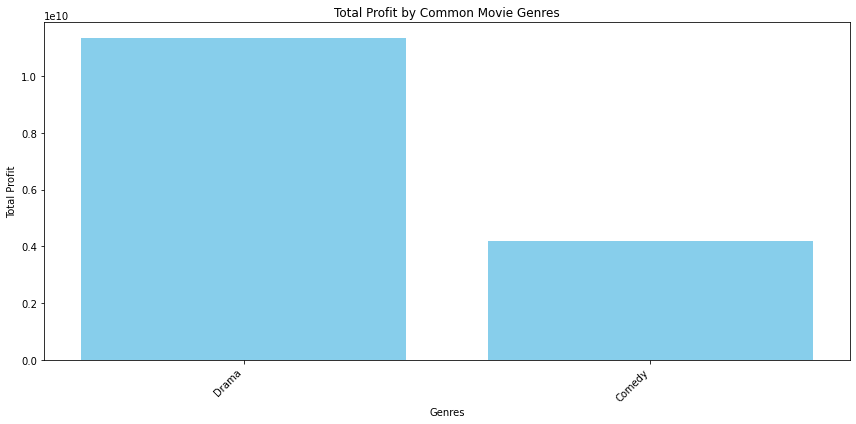

In [112]:
# Data
genres = common_genres_df['Genre']
profits = common_genres_df['Total Profit']

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genres, profits, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Total Profit')
plt.title('Total Profit by Common Movie Genres')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Conslusion

In conclusion, the analysis undertaken to achieve Objective Three, which is to identify the Three Most Reviewed and Profitable Genres, has provided valuable insights into the film industry. By combining data from multiple sources and applying various data manipulation and visualization techniques, we have gained a comprehensive understanding of which movie genres strike a balance between popularity and financial success.

First, we examined movie review data from Rotten Tomatoes and IMDb to identify the most reviewed genres. The genres "Drama" and "Comedy" emerged as the most frequently reviewed genres, demonstrating their enduring appeal to both critics and audiences. These genres have consistently garnered attention and feedback from viewers.

Next, we explored IMDb's dataset to identify genres with the highest average ratings and the most votes. While these metrics indicate the quality and popularity of movies within specific genres, we found that they do not always align with profitability.

To address the profitability aspect, we merged data from Box Office Mojo with information about production budgets and worldwide gross earnings. This allowed us to calculate the profit for each movie and identify which genres have been the most financially successful. Surprisingly, the horror genre emerged as one of the most profitable genres, with several horror movies achieving remarkable returns on investment. Family and adventure genres also demonstrated high profitability.

Finally, we combined these findings by identifying common genres across the three datasets – Rotten Tomatoes, IMDb, and Box Office Mojo – and calculated their total profits. This approach provided a balanced view of genres that not only receive significant attention but also generate substantial financial gains. "Drama" and "Comedy" once again stood out as the top two genres in terms of total profit, reaffirming their status as evergreen genres in the film industry.

In summary, the analysis undertaken for Objective Three has uncovered valuable insights into the film industry's most reviewed and profitable genres. It has highlighted the enduring popularity of "Drama" and "Comedy" while shedding light on the unexpectedly high profitability of the horror genre. Filmmakers and industry stakeholders can leverage these findings to make informed decisions about genre selection, aiming to strike a balance between critical acclaim, audience engagement, and financial success in their movie projects.
